In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet

In [ ]:
df = pd.read_csv('../data/denver_prop2.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [ ]:
df.head()

,property_id,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,zipcode,sqft,bedrooms,full_baths,half_baths,rooms
0,578614980,39.24476,-104.96627,2016-03-01,2016-06-10,NaN,NaN,NaN,80118,2516.0,4.0,4.0,NaN,9.0
1,578614980,39.24476,-104.96627,2019-10-04,2020-01-22,NaN,NaN,NaN,80118,2516.0,4.0,4.0,NaN,9.0
2,666683907,39.65265,-104.97606,2016-03-01,2016-06-24,NaN,NaN,NaN,80113,456.0,1.0,1.0,NaN,2.0
3,648021453,39.76551,-104.90495,2016-03-01,2016-03-01,NaN,NaN,NaN,80207,3770.0,8.0,4.0,NaN,NaN
4,660737082,39.76418,-105.04427,2016-03-01,NaT,NaN,2016-07-27,NaN,80212,2800.0,4.0,4.0,NaN,NaN


In [ ]:
df_list_agg_week = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.week]).agg(count='count')

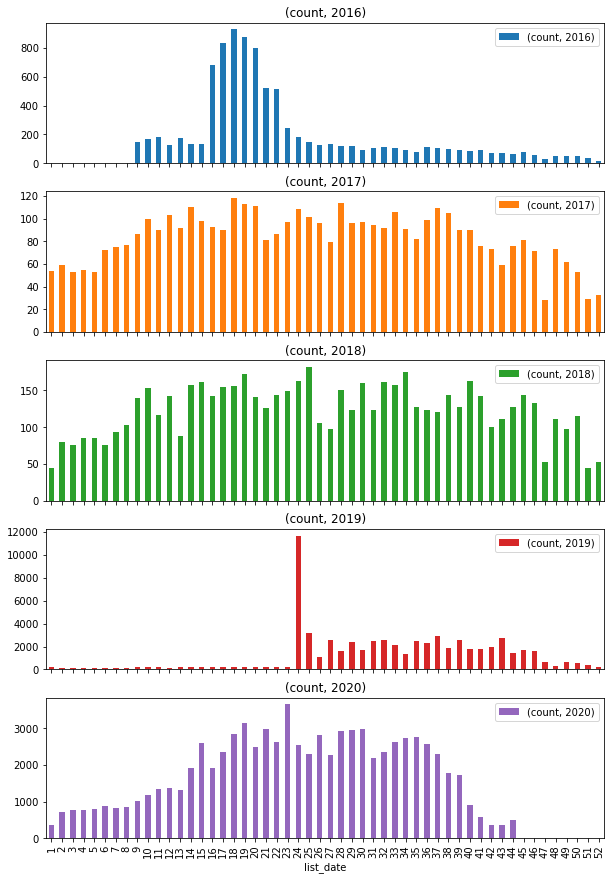

In [ ]:
ax_list_week = df_list_agg_week.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [ ]:
print('max number of bedrooms: {}'.format(df['bedrooms'].max()))
print('min number of bedrooms: {}'.format(df['bedrooms'].min()))

max number of bedrooms: 99.0
min number of bedrooms: -1.0


In [ ]:
negative_bedrooms = df[df['bedrooms'] == -1]
negative_bedrooms.head()

,property_id,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,zipcode,sqft,bedrooms,full_baths,half_baths,rooms
115211,97920,40.030148,-105.260497,2020-05-17,NaT,NaN,NaN,NaN,80304,400.0,-1.0,1.0,NaN,NaN


In [ ]:
# propbably it is a studio, change the number of bedrooms to 0
df.at[115211, 'bedrooms'] = 0

In [ ]:
print('max number of bedrooms: {}'.format(df['bedrooms'].max()))
print('min number of bedrooms: {}'.format(df['bedrooms'].min()))

max number of bedrooms: 99.0
min number of bedrooms: 0.0


In [ ]:
large_bedrooms = df[df['bedrooms'] >= 10]

In [ ]:
df[df['bedrooms'] == 99]

,property_id,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,zipcode,sqft,bedrooms,full_baths,half_baths,rooms
121392,2145213162,40.067074,-105.069135,2020-06-01,NaT,NaN,NaN,NaN,80516,NaN,99.0,NaN,NaN,NaN


In [ ]:
large_bedrooms

,property_id,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,zipcode,sqft,bedrooms,full_baths,half_baths,rooms
187,651135336,39.765060,-105.051210,2016-03-07,2016-11-30,NaN,NaN,NaN,80212,3014.0,12.0,6.0,NaN,NaN
192,647051535,39.715800,-104.986500,2016-03-07,2016-03-07,NaN,NaN,NaN,80209,8922.0,17.0,NaN,NaN,NaN
420,656641893,39.731300,-104.972770,2016-03-14,2016-03-14,NaN,NaN,NaN,80218,5011.0,10.0,7.0,NaN,NaN
480,659201577,40.102230,-105.170230,2016-03-16,2016-12-20,NaN,NaN,NaN,80503,17962.0,15.0,NaN,NaN,NaN
591,658688931,39.778060,-105.065300,2016-03-18,2016-03-18,NaN,NaN,NaN,80033,6218.0,16.0,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156602,138504356,39.759240,-105.219570,2020-09-02,2020-10-13,NaN,NaN,NaN,80401,6682.0,12.0,5.0,1.0,18.0
160352,82029927,39.131255,-104.672142,2020-09-15,NaT,2020-10-28,NaN,NaN,80118,11624.0,12.0,12.0,NaN,NaN
161608,13804954,39.598640,-105.315628,2020-09-18,NaT,NaN,NaN,NaN,80439,5872.0,11.0,7.0,NaN,NaN
163538,13709616,39.759102,-105.219463,2020-09-25,NaT,2020-10-14,NaN,NaN,80401,NaN,12.0,6.0,NaN,NaN


In [ ]:
small_bedrooms = df[df['bedrooms'] <= 10]
mid_bedrooms = df[(df['bedrooms'] <= 35) & (df['bedrooms'] > 10)]
large_bedrooms = df[df['bedrooms'] > 35]

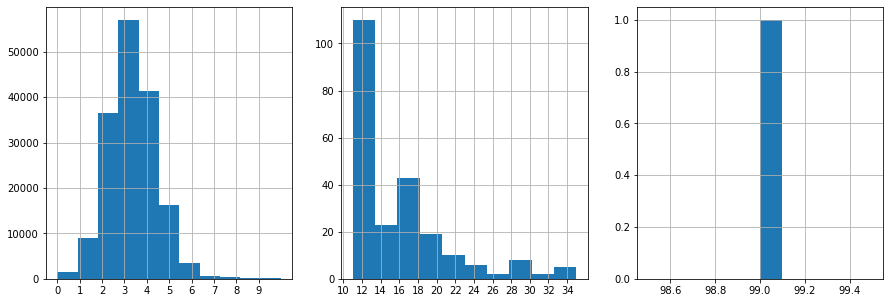

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].set_xticks(np.arange(0, 10, 1))
hist_sm = small_bedrooms['bedrooms'].hist(bins=11, xlabelsize=10, ax = axs[0])
axs[1].set_xticks(np.arange(10, 35, 2))
hist_mid = mid_bedrooms['bedrooms'].hist(xlabelsize=10, ax=axs[1])
hist_lg = large_bedrooms['bedrooms'].hist(xlabelsize=10, ax=axs[2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f64219280>,
      dtype=object)

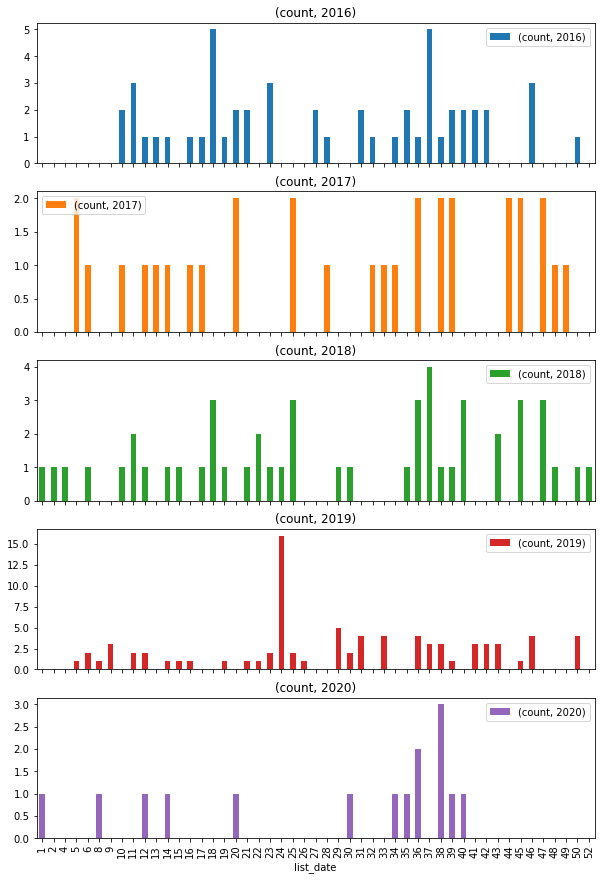

In [ ]:
tmp = mid_bedrooms['property_id'].groupby([mid_bedrooms.list_date.dt.year, mid_bedrooms.list_date.dt.week]).agg(count='count')
tmp.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>